### Basado en :   https://www.kaggle.com/code/barisscal/diamonds-linear-regression-and-metrics-98

# EDA y regresión lineal con métricas de evaluación en el conjunto de datos de diamantes


Aplicaremos la regresión lineal en el conjunto de datos de diamantes. Aquí se usaron 9 métricas de evaluación.

<a id = "1"></a>
# Cargando Librerías

In [19]:
import numpy as np
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

import graphviz


from scipy.stats import norm, skew, boxcox
from sklearn.model_selection import KFold


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

<a id = "2"></a>
# Lectura de Datos

In [20]:
dataset = pandas.read_csv('/content/3.3.3 diamonds.csv')
dataset.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
16076,16077,1.09,Ideal,H,VS2,61.4,57.0,6419,6.61,6.65,4.07
27025,27026,2.02,Premium,H,SI2,61.5,58.0,17166,8.14,8.10,4.99
53835,53836,0.70,Premium,G,VVS2,59.6,61.0,2737,5.86,5.78,3.47
35036,35037,0.40,Premium,F,SI1,61.5,60.0,882,4.77,4.70,2.91
30361,30362,0.36,Premium,H,VS2,60.0,62.0,729,4.62,4.58,2.76
25509,25510,1.51,Premium,E,VS2,62.2,59.0,14300,7.36,7.31,4.56
51720,51721,0.70,Good,F,VS1,64.0,56.0,2401,5.60,5.65,3.60
13670,13671,1.17,Very Good,G,SI2,61.2,58.0,5595,6.84,6.86,4.19
32583,32584,0.31,Ideal,F,VVS1,61.9,55.0,801,4.37,4.42,2.72
44638,44639,0.51,Ideal,E,VS2,62.1,54.0,1608,5.13,5.15,3.19


In [21]:
dataset.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [22]:
dataset.drop('Unnamed: 0', axis = 1, inplace = True)

<a id = "3"></a>
## Variable Descriptions

* Quilates --> peso del diamante (0,2--5,01)
* Corte --> Describe la calidad de corte del diamante. Calidad en orden creciente Regular, Buena, Muy Buena, Premium, Ideal
* Color --> Color del diamante, siendo D el mejor y J el peor
* Claridad --> Qué tan obvias son las inclusiones dentro del diamante: (en orden de mejor a peor, FL = impecable, I3 = inclusiones de nivel 3) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2 , I3
* Profundidad --> La altura de un diamante, medida desde el culet hasta la mesa, dividida por su diámetro promedio de faja.
* Tabla --> El ancho de la mesa del diamante expresado como porcentaje de su diámetro promedio.
* Precio --> el precio del diamante.
* x --> longitud mm
* y --> ancho mm
* z --> profundidad mm


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [24]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id = "4"></a>
### Análisis de variables univariadas

* Variables categóricas: ['corte', 'color', 'claridad']

* Variables numéricas: ['quilates', 'profundidad', 'tabla', 'x', 'y', 'z', 'precio']

<a id = "5"></a>
#### Variables Categóricas

In [25]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [26]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['cut', 'color', 'clarity']


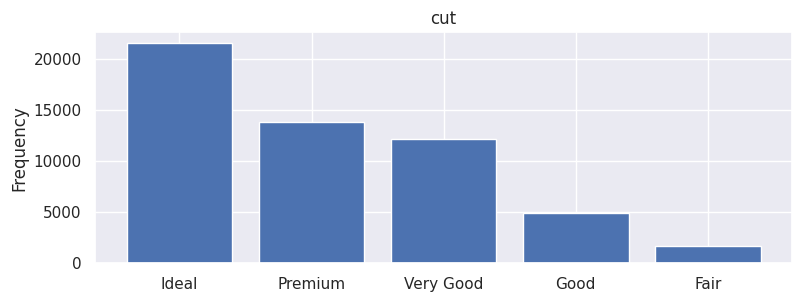

cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


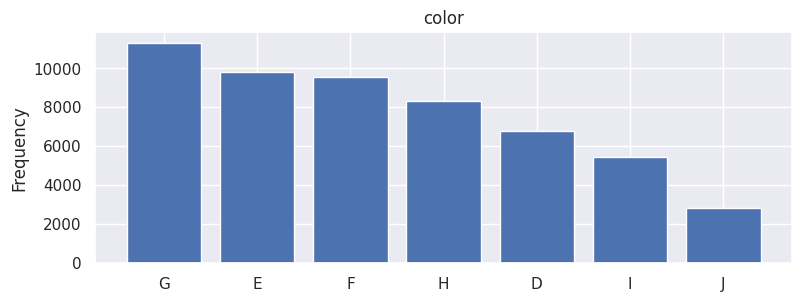

color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64


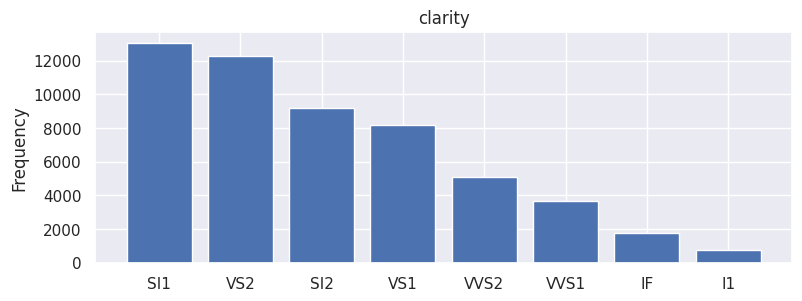

clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [27]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

<a id = "6"></a>
#### Variables Numéricas

In [15]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['carat', 'depth', 'table', 'x', 'y', 'z']


Text(0.5, 1.0, 'depth Interval and Counts')

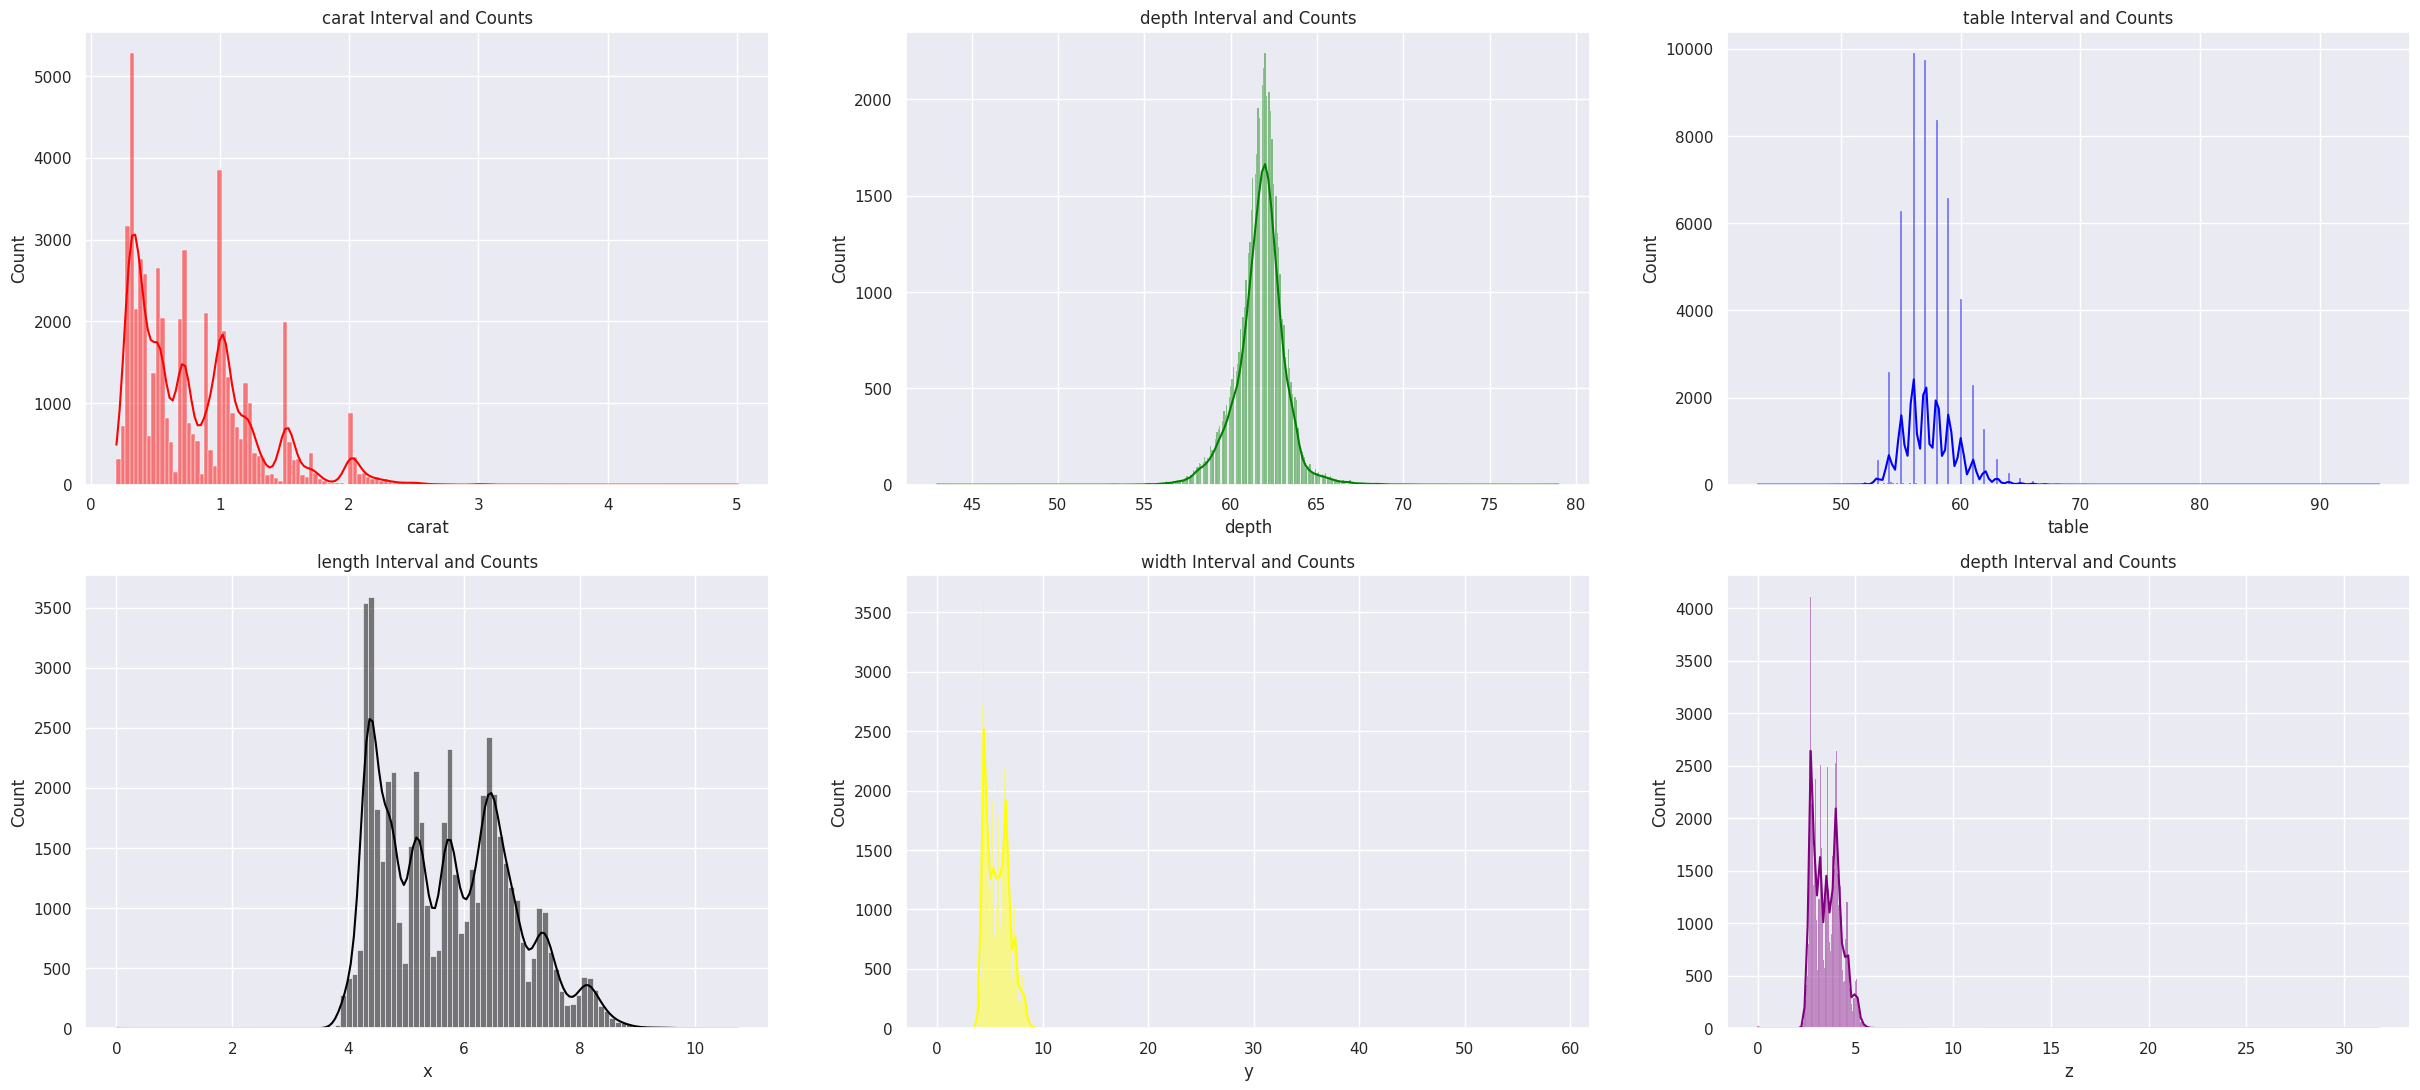

In [16]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.histplot(dataset['carat'], color = 'red', kde = True).set_title('carat Interval and Counts')

plt.subplot(3,3,2)
sns.histplot(dataset['depth'], color = 'green', kde = True).set_title('depth Interval and Counts')

plt.subplot(3,3,3)
sns.histplot(dataset['table'], kde = True, color = 'blue').set_title('table Interval and Counts')

plt.subplot(3,3,4)
sns.histplot(dataset['x'], kde = True, color = 'black').set_title('length Interval and Counts')

plt.subplot(3,3,5)
sns.histplot(dataset['y'], kde = True, color = 'yellow').set_title('width Interval and Counts')

plt.subplot(3,3,6)
sns.histplot(dataset['z'], kde = True, color = 'purple').set_title('depth Interval and Counts')

<a id = "7"></a>
# Análisis Básico de Datos

<a id = "8"></a>
## Corte - Precio

In [28]:
dataset[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)

,cut,price
3,Premium,4584.257704
0,Fair,4358.757764
4,Very Good,3981.759891
1,Good,3928.864452
2,Ideal,3457.541970


In [29]:
mean_price_by_cut = dataset[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)

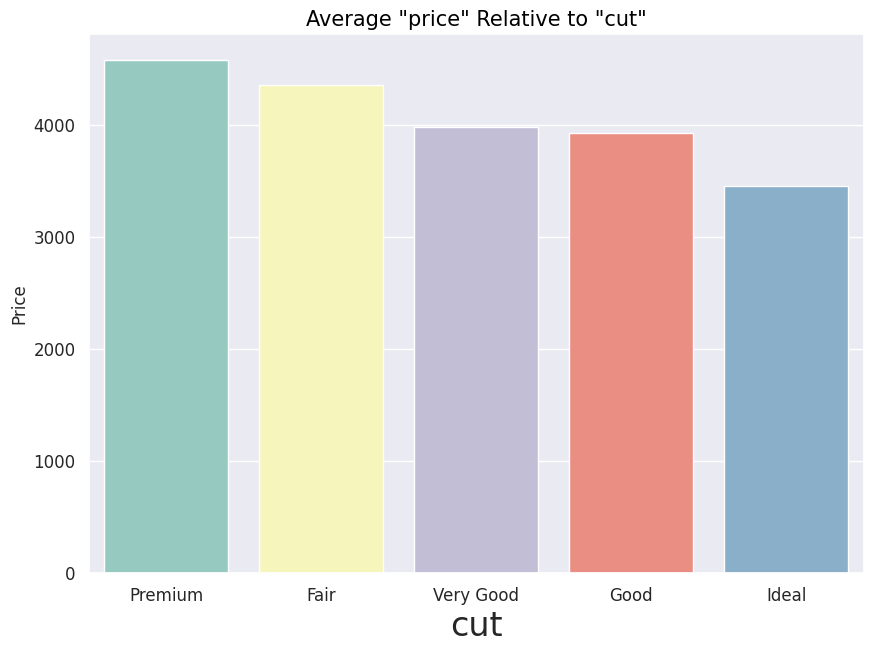

In [30]:
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_cut['cut'], y = mean_price_by_cut['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('cut', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "cut"',color = 'black',fontsize=15)
plt.show()

In [ ]:
labels = dataset['cut'].value_counts().index
sizes = dataset['cut'].value_counts().values
myexplode = [0.05, 0, 0, 0, 0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'cut'",color = 'black',fontsize = 15)

**Los diamantes con talla 'Ideal' constituyen la mayoría. No se puede decir que los recortes se distribuyan uniformemente. Sólo hay dos valores cercanos entre sí.**

<a id = "9"></a>
## Color - Precio

In [49]:
dataset[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)

,color,price
6,J,5237.818900
5,I,4985.806109
4,H,4428.770861
3,G,3980.247382
2,F,3708.118975
0,D,3153.333284
1,E,3060.094644


In [50]:
mean_price_by_color = dataset[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)

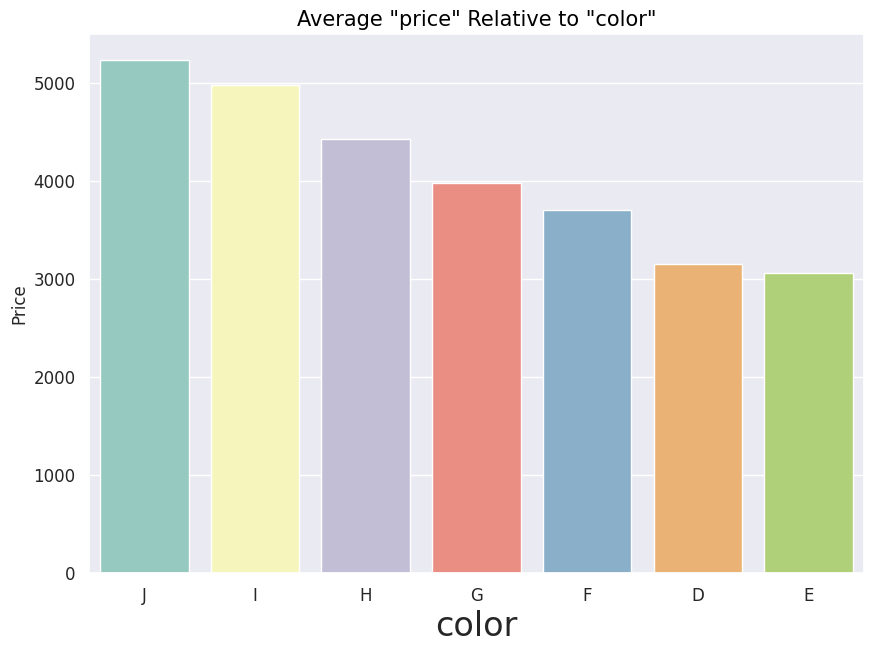

In [51]:
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_color['color'], y = mean_price_by_color['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('color', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "color"',color = 'black',fontsize=15)
plt.show()

Text(0.5, 1.0, "Distribution of Diamonds by 'color'")

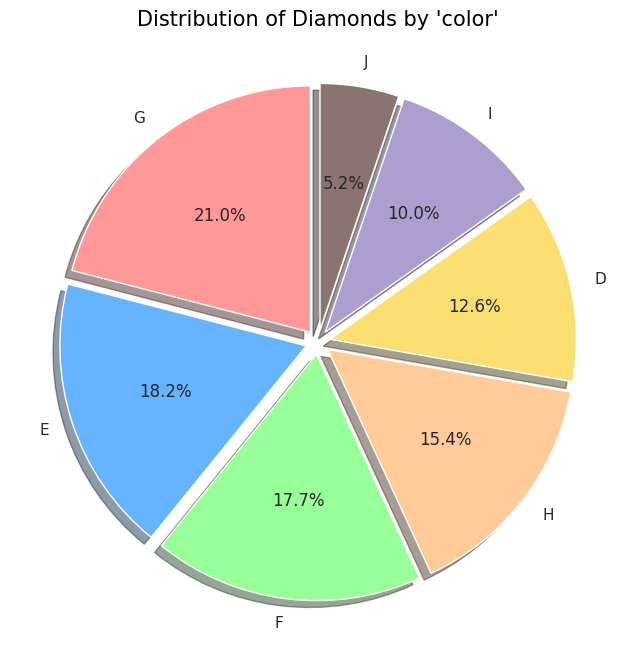

In [48]:
labels = dataset['color'].value_counts().index
sizes = dataset['color'].value_counts().values
myexplode = [0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'color'",color = 'black',fontsize = 15)

**Tenemos 7 colores. Están disminuyendo a un ritmo cercano. La 'G' es la mayoría.**

<a id = "10"></a>
## Claridad - Precio

In [31]:
mean_price_by_clarity = dataset[["clarity","price"]].groupby(["clarity"], as_index = False).mean().sort_values(by="price",ascending = False)

In [32]:
dataset[["clarity","price"]].groupby(["clarity"], as_index = False).mean().sort_values(by="price",ascending = False)

,clarity,price
3,SI2,5063.028606
2,SI1,3996.001148
5,VS2,3924.989395
0,I1,3924.168691
4,VS1,3839.455391
7,VVS2,3283.737071
1,IF,2864.839106
6,VVS1,2523.114637


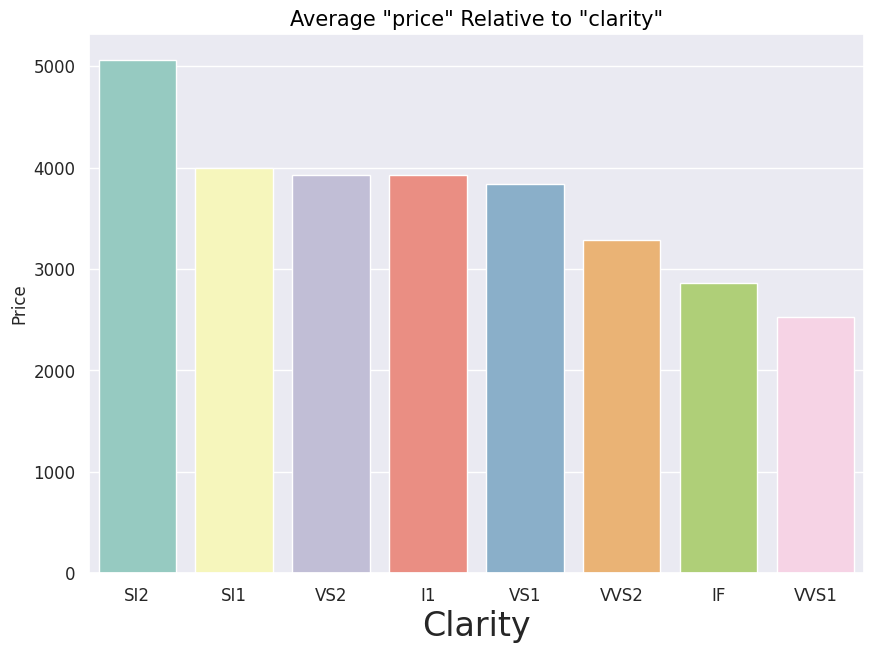

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_clarity['clarity'], y = mean_price_by_clarity['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('Clarity', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "clarity"',color = 'black',fontsize=15)
plt.show()

Text(0.5, 1.0, "Distribution of Diamonds by 'clarity'")

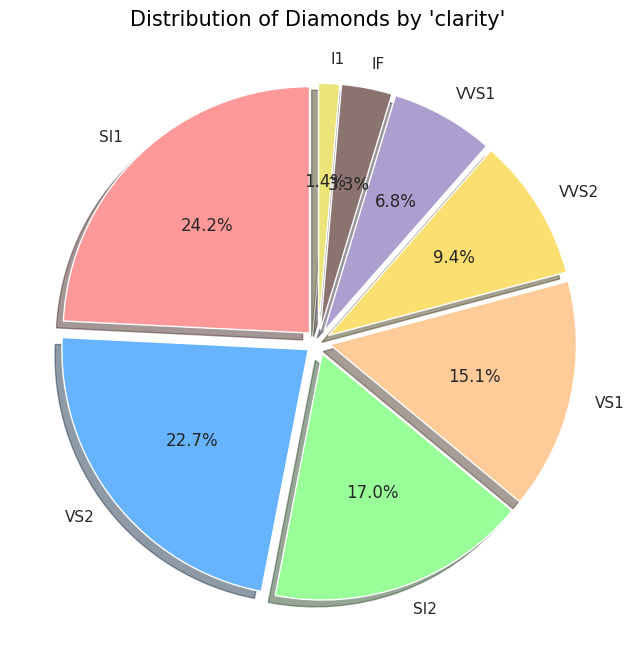

In [34]:
labels = dataset['clarity'].value_counts().index
sizes = dataset['clarity'].value_counts().values
myexplode = [0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470','#ebe478']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'clarity'",color = 'black',fontsize = 15)

Hay 8 valores diferentes de 'Claridad'. No se observa una distribución desigual.

<a id = "11"></a>
## Carátula - Precio

In [ ]:
dataset[["carat","price"]].groupby(["carat"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=dataset, x="carat", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

**Se puede decir que la variable 'Precio' generalmente aumenta dependiendo del 'quilate'. Sin embargo, no existe una relación lineal entre ellos. Variables como "color", "corte" y "claridad" pueden estar afectando esto.**

<a id = "12"></a>
## Profundidad - Precio

In [ ]:
dataset[["depth","price"]].groupby(["depth"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
g = sns.JointGrid(data=dataset, x="depth", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)



```
# This is formatted as code
```

<a id = "13"></a>
## Tabla - Precio

In [ ]:
dataset[["table","price"]].groupby(["table"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
g = sns.JointGrid(data=dataset, x="table", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "14"></a>
## x - Precio

In [ ]:
g = sns.JointGrid(data=dataset, x="x", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "15"></a>
## y - Precio

In [ ]:
g = sns.JointGrid(data=dataset, x="y", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "16"></a>
## z - Precio

In [ ]:
g = sns.JointGrid(data=dataset, x="z", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "17"></a>
# Visualización de Datos

<Axes: xlabel='clarity', ylabel='price'>

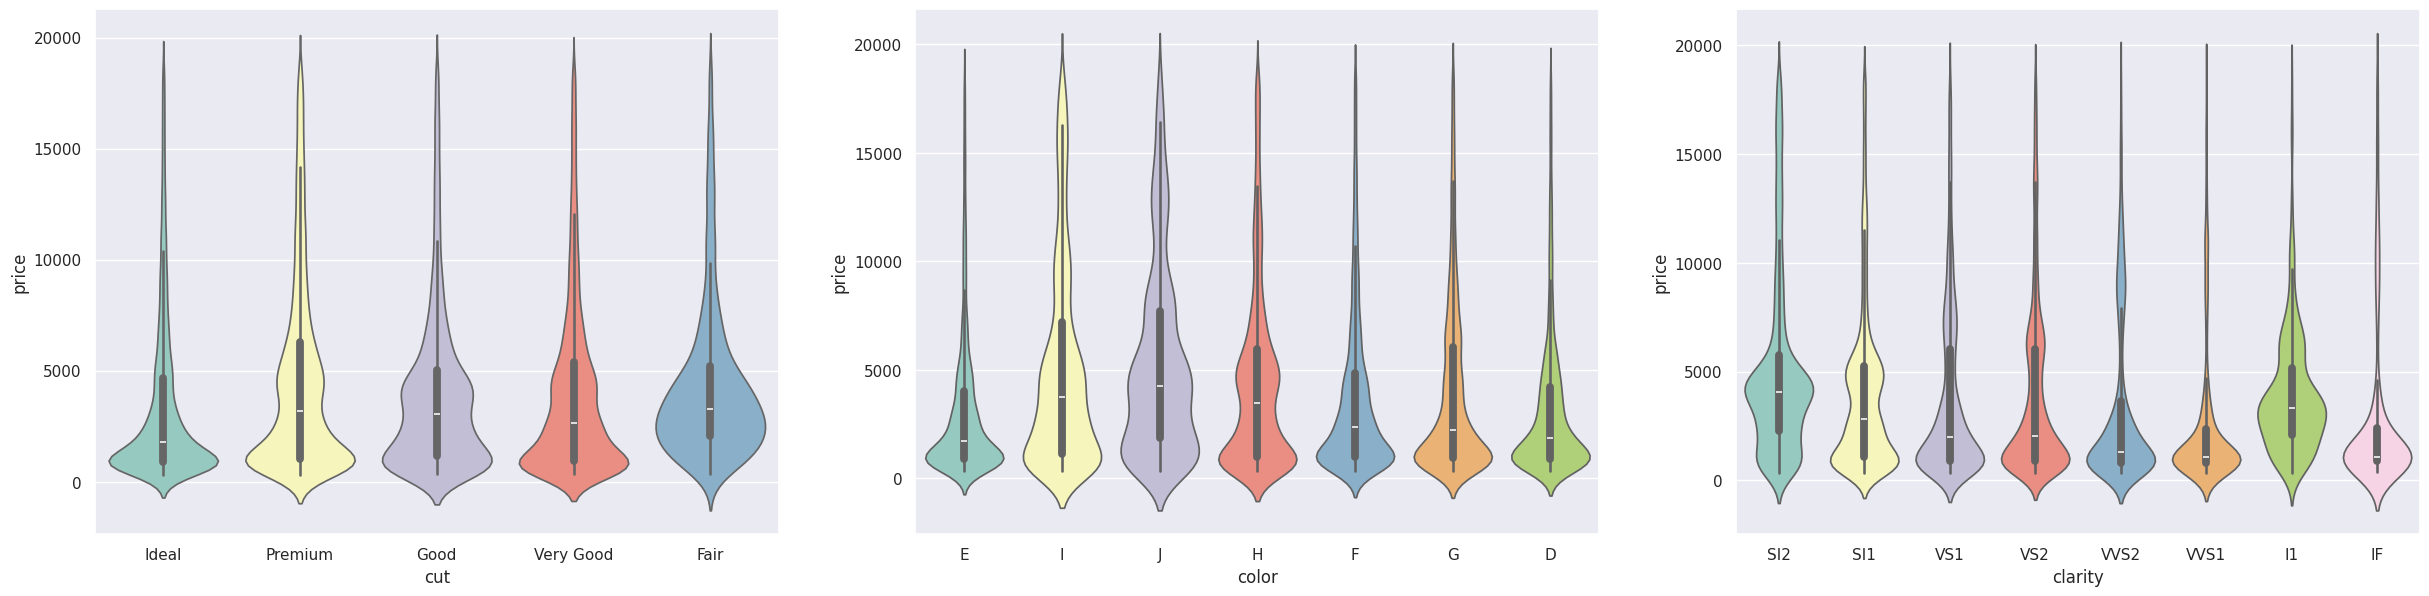

In [35]:
plt.figure(figsize=(30,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'cut', y = 'price', data = dataset, palette="Set3")
plt.subplot(2,3,2)
sns.violinplot(x = 'color', y = 'price', data = dataset, palette="Set3")
plt.subplot(2,3,3)
sns.violinplot(x = 'clarity', y = 'price', data = dataset, palette="Set3")

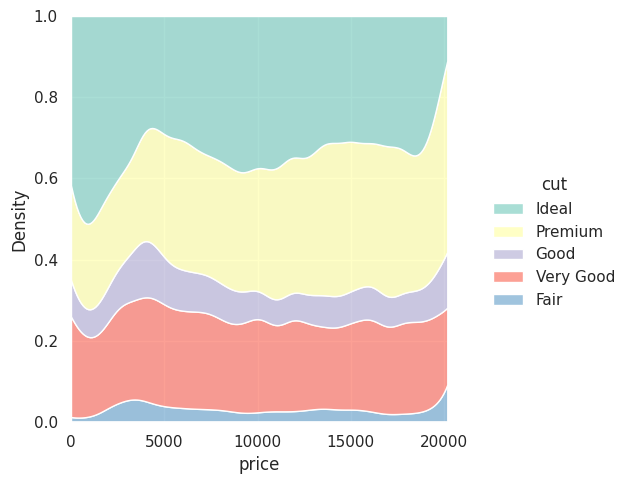

In [36]:
sns.displot(data=dataset, x='price', hue='cut', kind='kde', multiple="fill", clip=(0,None), palette="Set3")

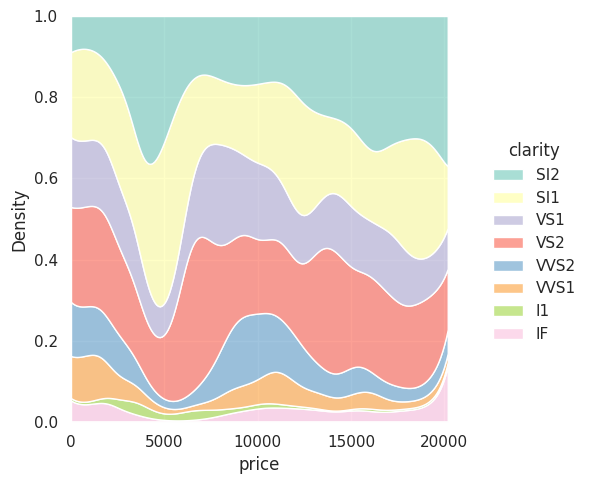

In [37]:
sns.displot(data=dataset, x='price', hue='clarity', kind='kde', multiple="fill", clip=(0,None), palette="Set3")

In [ ]:
sns.displot(data=dataset, x='price', hue='color', kind='kde', multiple="fill", clip=(0,None), palette="Set3")

<a id = "19"></a>
# Detección de Anomalías

Una anomalía es aquella que difiere/se desvía significativamente de otras observaciones en la misma muestra. Un patrón de detección de anomalías produce dos resultados diferentes. La primera es una etiqueta categórica que indica si la observación es anormal o no; el segundo es una puntuación o valor de confianza. La partitura contiene más información que la etiqueta. Porque también nos dice cuán anormal es la observación. La etiqueta simplemente te indica si es anormal. Si bien el etiquetado es más común en los métodos supervisados, la puntuación es más común en los métodos no supervisados y semisupervisados..

In [38]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction

def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [39]:
dataset.loc[detect_outliers(dataset,['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])]

,carat,cut,color,clarity,depth,table,price,x,y,z
13992,2.01,Fair,I,I1,55.9,64.0,5696,8.48,8.39,4.71
17196,2.72,Fair,J,I1,68.2,56.0,6870,8.46,8.43,5.76
18067,2.01,Fair,F,I1,58.7,66.0,7294,8.30,8.19,4.84
19346,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
21758,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
...,...,...,...,...,...,...,...,...,...,...
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00


In [40]:
# drop outliers
dataset = dataset.drop(detect_outliers(dataset,['carat', 'depth', 'table', 'x', 'y', 'z', 'price']),axis = 0).reset_index(drop = True)

In [41]:
dataset = dataset.dropna()

In [42]:
dataset = dataset[dataset.x != 0]
dataset = dataset[dataset.y != 0]
dataset = dataset[dataset.z != 0]

In [43]:
(dataset['x'] == 0).sum().sum()

0

In [44]:
(dataset['y'] == 0).sum().sum()

0

In [45]:
(dataset['z'] == 0).sum().sum()

0

<a id = "25"></a>
# Correlación

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

ValueError: could not convert string to float: 'Ideal'

<Figure size 1200x800 with 0 Axes>

<a id = "26"></a>
# One-Hot Encoding

Hay más de 2 valores únicos para cada característica. Por lo tanto, la codificación One-Hot será más útil que la codificación de etiquetas. La codificación de etiquetas puede ser causa de sobreajuste.

In [53]:
cat_var =  ['cut', 'color', 'clarity']

for i in range (0, len(cat_var)):
    print(f'Unique Values for {cat_var[i]}', dataset[f'{cat_var[i]}'].unique())

Unique Values for cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique Values for color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique Values for clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [54]:
onehotencoder = OneHotEncoder()

In [55]:
one_hot = ['cut', 'color', 'clarity']

for i in range(0, len(one_hot)):
    dataset[f'{one_hot[i]}'] = pd.Categorical(dataset[f'{one_hot[i]}'])
    dummies = pd.get_dummies(dataset[f'{one_hot[i]}'], prefix = f'{one_hot[i]}_encoded')
    dataset.drop([f'{one_hot[i]}'], axis=1, inplace=True)
    dataset = pd.concat([dataset, dummies], axis=1)

In [56]:
dataset

,carat,depth,table,price,x,y,z,cut_encoded_Fair,cut_encoded_Good,cut_encoded_Ideal,...,color_encoded_I,color_encoded_J,clarity_encoded_I1,clarity_encoded_IF,clarity_encoded_SI1,clarity_encoded_SI2,clarity_encoded_VS1,clarity_encoded_VS2,clarity_encoded_VVS1,clarity_encoded_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53751,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53752,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53753,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53754,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


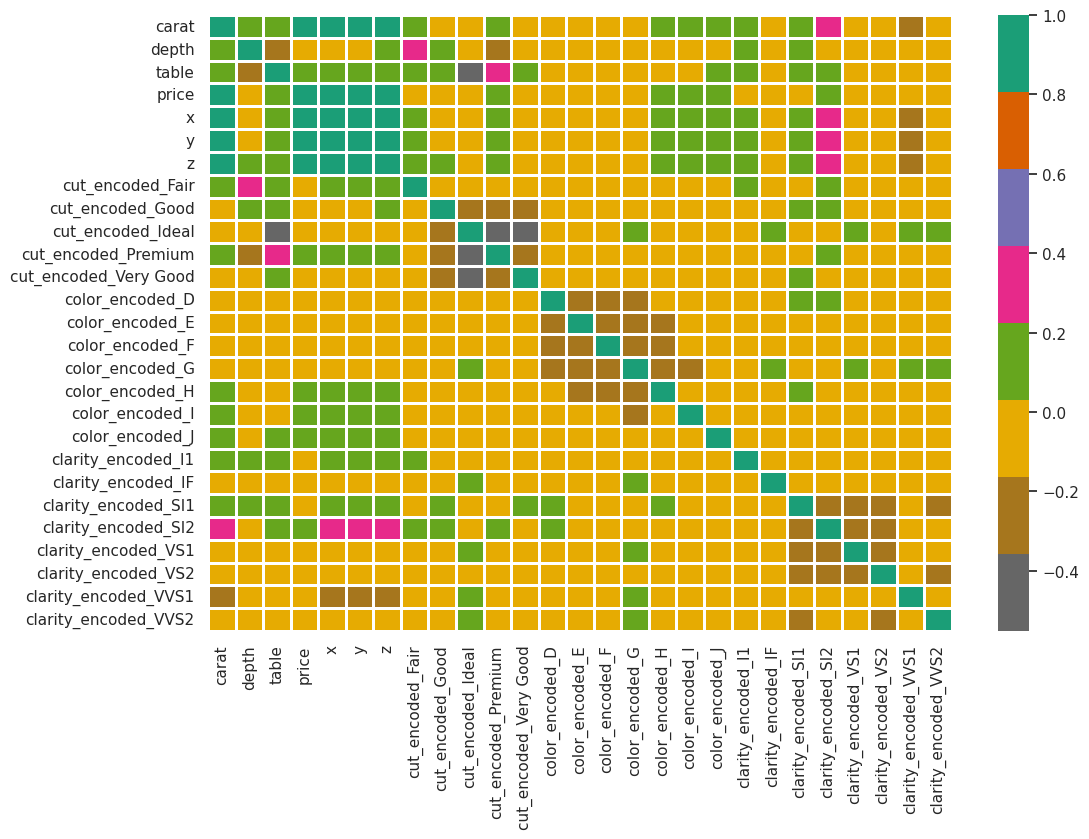

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

<a id = "27"></a>
# Train-Test Split

In [58]:
X = dataset.drop(["price"],axis =1)
y = dataset["price"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 53748
Total # of sample in train dataset: 36011
Total # of sample in test dataset: 17737


In [60]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id = "28"></a>
# Regresión Lineal

<a id = "29"></a>
## Optimización de Hyper-Parameter

In [61]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [62]:


# Definir parámetros
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

# Crear el modelo de regresión lineal
model = LinearRegression()

# Realizar la búsqueda de hiperparámetros
gcv = GridSearchCV(model, parameters, cv=15, verbose=1, n_jobs=-1).fit(X_train, y_train)
#
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')


Fitting 15 folds for each of 8 candidates, totalling 120 fits
GridSearchView Best Score: 92.26733533295878
GridSearchView Best Estimator: LinearRegression()
GridSearchView Best Params: {'copy_X': True, 'fit_intercept': True, 'positive': False}


<a id = "30"></a>
## Modelo

In [63]:
model = LinearRegression(copy_X=True, fit_intercept=True, positive=True, n_jobs = -1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 91.79443675422043
Test score of trained model: 91.61328028879


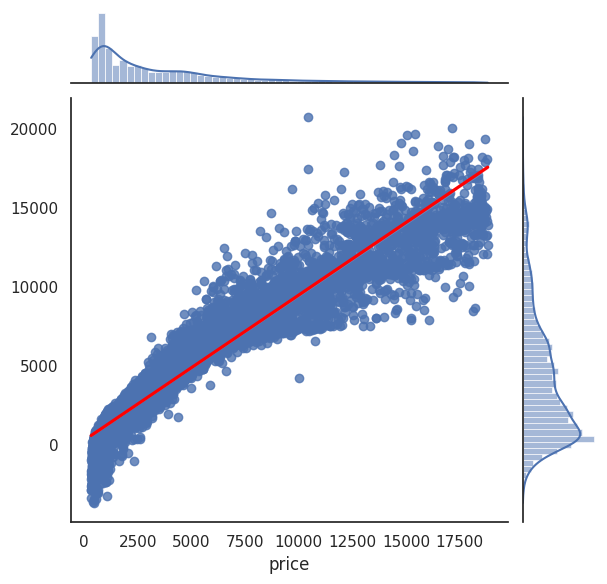

In [64]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

<a id = "31"></a>
## Métricas de Evaluación

<a id = "32"></a>
### Varianza explicada
Función de puntuación de regresión de varianza explicada.

La mejor puntuación posible es 1,0; los valores más bajos son peores.

Si \hat{y} es el resultado objetivo estimado, y el resultado objetivo correspondiente (correcto) y Var es la varianza, el cuadrado de la desviación estándar, entonces la varianza explicada se estima de la siguiente manera:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>e</mi>
  <mi>x</mi>
  <mi>p</mi>
  <mi>l</mi>
  <mi>a</mi>
  <mi>i</mi>
  <mi>n</mi>
  <mi>e</mi>
  <mi>d</mi>
  <mi mathvariant="normal">_</mi>
  <mrow></mrow>
  <mi>v</mi>
  <mi>a</mi>
  <mi>r</mi>
  <mi>i</mi>
  <mi>a</mi>
  <mi>n</mi>
  <mi>c</mi>
  <mi>e</mi>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow>
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mfrac>
    <mrow>
      <mi>V</mi>
      <mi>a</mi>
      <mi>r</mi>
      <mo fence="false" stretchy="false">{</mo>
      <mi>y</mi>
      <mo>&#x2212;</mo>
      <mrow>
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo fence="false" stretchy="false">}</mo>
    </mrow>
    <mrow>
      <mi>V</mi>
      <mi>a</mi>
      <mi>r</mi>
      <mo fence="false" stretchy="false">{</mo>
      <mi>y</mi>
      <mo fence="false" stretchy="false">}</mo>
    </mrow>
  </mfrac>
</math>

In [65]:
print("Explained Variance:",metrics.explained_variance_score(y_test, pred))

Explained Variance: 0.9161341831416511


<a id = "33"></a>
### Error máximo

La función max_error calcula el error residual máximo, una métrica que captura el peor de los casos entre el valor previsto y el valor real. En un modelo de regresión de salida única perfectamente ajustado, max_error sería 0 en el conjunto de entrenamiento y, aunque esto sería muy poco probable en el mundo real, esta métrica muestra el grado de error que tuvo el modelo cuando se ajustó.

Si yi es el valor predicho de la i-ésima muestra y yi es el valor verdadero correspondiente, entonces el error máximo se define como:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Max Error</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow>
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>m</mi>
  <mi>a</mi>
  <mi>x</mi>
  <mo stretchy="false">(</mo>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mrow>
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <mo stretchy="false">)</mo>
</math>

In [66]:
print("Max Error:",metrics.max_error(y_test, pred))

Max Error: 10326.034071040875


<a id = "34"></a>
### Error Cuadrático Medio

El error cuadrático medio (MSE) es la función de pérdida de regresión más utilizada. MSE es la pérdida promedio de fotogramas por muestra en todo el conjunto de datos. Para calcular el MSE, sume todas las pérdidas de cuadros para muestras individuales y luego divida por el número de muestras.

In [67]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test, pred))

Mean Squared Error: 1304685.9812207809


<a id = "35"></a>
### Error Absoluto Medio

El error absoluto es la diferencia entre los valores estimados y los valores reales. Para ser exactos, es la media del valor absoluto de cada diferencia entre el valor real y el valor previsto para esa muestra en toda la muestra del conjunto de datos.

In [68]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error: 802.4633294170181


<a id = "36"></a>
### Porcentaje de Error Absoluto Medio

En los modelos de regresión y de series de tiempo, el error porcentual absoluto medio se utiliza con frecuencia para medir la precisión de las predicciones. Si entre los valores reales hay cero, el MAPE no se puede calcular ya que habrá división por cero. El error porcentual no puede exceder el 100% para valores predictivos muy bajos, pero no existe un límite superior para el error porcentual para valores predictivos muy altos. Cuando se utiliza MAPE para comparar la precisión de los estimadores, está sesgado ya que selecciona sistemáticamente un método que es demasiado bajo para las estimaciones. Este pequeño pero grave problema se puede superar con un criterio de precisión que encuentre la relación entre los valores predichos y sus valores verdaderos. Este enfoque conduce a estimaciones que pueden interpretarse en términos de la media geométrica.

In [69]:
print("Mean Absolute Percentage Error:",metrics.mean_absolute_percentage_error(y_test, pred))

Mean Absolute Percentage Error: 0.4552810344022715


<a id = "37"></a>
### Error Mediana Absoluto

El mediana_absolute_error es particularmente interesante porque es robusto ante valores atípicos. La pérdida se calcula tomando la mediana de todas las diferencias absolutas entre el objetivo y la predicción.

* Pérdida media de regresión por error absoluto.

* La salida del error absoluto medio es punto flotante no negativo. El mejor valor es 0,0.

In [70]:
print("Median Absolute Error:",metrics.median_absolute_error(y_test, pred))

Median Absolute Error: 607.3650294651343


<a id = "38"></a>
### R cuadrado

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se le conoce como coeficiente de determinación o coeficiente de determinación múltiple para regresión múltiple. Para decirlo en un lenguaje más sencillo, R-cuadrado es una medida de ajuste para modelos de regresión lineal.

In [71]:
print("R^2:",metrics.r2_score(y_test, pred))

R^2: 0.9161328028878999


<a id = "39"></a>
### R Cuadrado ajustado

Cada argumento adicional agregado a un modelo siempre aumenta el valor R².

A medida que se agrega la variable independiente, el modelo se vuelve más complejo; cuando el modelo se vuelve complejo, se produce un "sobreajuste". Por tanto, el R cuadrado aumenta.

El R-cuadrado ajustado entra en juego para resolver estos problemas. El R-cuadrado ajustado compensa cada variable independiente y solo aumenta cuando cada variable dada mejora el modelo por encima de lo posible.

In [72]:
n=X_test.shape[0]
p=X_test.shape[1] - 1
R2 = metrics.r2_score(y_test, pred)

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Adjusted R Squared: 0.916014419966111


<a id = "40"></a>
### Error cuadrático medio

Es una métrica cuadrática que mide la magnitud del error, a menudo utilizada para encontrar la distancia entre los valores predichos del predictor y los valores reales de un modelo de aprendizaje automático. La desviación estándar de los errores de estimación del RMSE (residuos). Es decir, los residuos son una medida de qué tan lejos está la línea de regresión de los puntos de datos; RMSE es una medida de hasta qué punto se propagan estos residuos. En otras palabras, le indica qué tan densos son los datos alrededor de la línea que mejor se ajusta a los datos. El valor RMSE puede variar de 0 a infinito. Las puntuaciones orientadas negativamente, es decir, los predictores con valores más bajos, funcionan mejor. Un valor RMSE cero significa que el modelo no cometió errores. RMSE tiene la ventaja de castigar más los errores grandes, por lo que puede adaptarse mejor a algunas situaciones. RMSE evita el uso no deseado de valores absolutos en muchos cálculos matemáticos.

In [73]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root Mean Squared Error: 1142.2285153246617
